# Bike Sharing Dataset Exploratory Analysis

* Based on Bike Sharing dataset from UCI Machine Learning Repository
* This notebook is based upon the hourly data file, i.e. hour.csv

# Import required packages


In [14]:
# data manipulation 
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# pandas display data frames as tables
from IPython.display import display, HTML

# Load dataset

In [2]:
df = pd.read_csv('../data/hour.csv')
df.shape

(17379, 17)

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Data Types and Summary Stats

In [4]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The dataset has:

* 17 attributes in total and 17k+ records
* Except dtedat, rest all are numeric(int or float)
* As stated on the UCI dataset page, the following attributes have been normalized (same is * confirmed above):
    * temp, atemp
    * humidity
    * windspeed
* Dataset has many categorical variables like season, yr, holiday, weathersit and so on. These will need to handled with care


# Preprocessing
* Standarize column names
* Typecast attributes
* Encode Categoricals using One Hot Encoding

## Standarize Column Names

In [9]:
# rename columns to make it more understandable and pythonic
df.rename(columns={'instant':'rec_id',
                    'dteday': 'datetime',
                   'holiday': 'is_holiday',
                   'workingday': 'is_workingday',
                   'weathersit': 'weather_condition',
                    'hum': 'humidity',
                   'mnth': 'month',
                   'cnt': 'total_count',
                   'hr': 'hour',
                   'yr': 'year'
}, inplace=True)

In [10]:
df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Typecast Attributes

In [11]:
# date time conversion
df['datetime'] = pd.to_datetime(df.datetime)

# categorical variables
df['season'] = df.season.astype('category')
df['is_holiday'] = df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

In [12]:
df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
is_holiday                 category
weekday                    category
is_workingday              category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

# Visualize Attributes, Trends and Relationships

## Hourly distribution of Total Counts
* Seasons are encoded as 1:spring, 2:summer, 3:fall, 4:winter

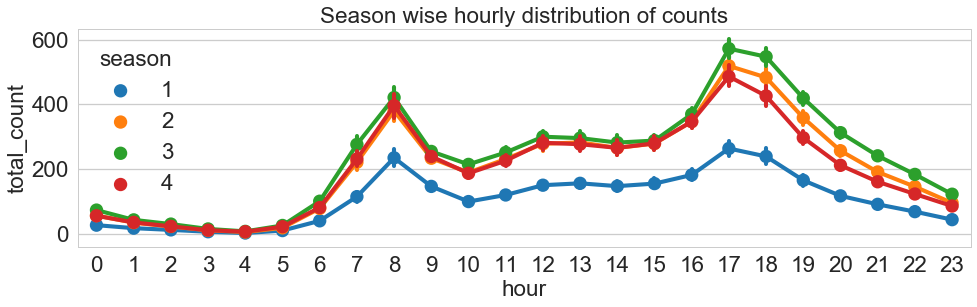

In [15]:
fig, ax = plt.subplots(figsize=(16,4))
sns.pointplot(data=df[['hour','total_count','season']],
              x='hour',
              y='total_count',
              hue='season',ax=ax)
ax.set(title = "Season wise hourly distribution of counts")
plt.show()

* The above plot shows peaks around 8am and 5pm (office hours)
* Overall higher usage in the second half of the day

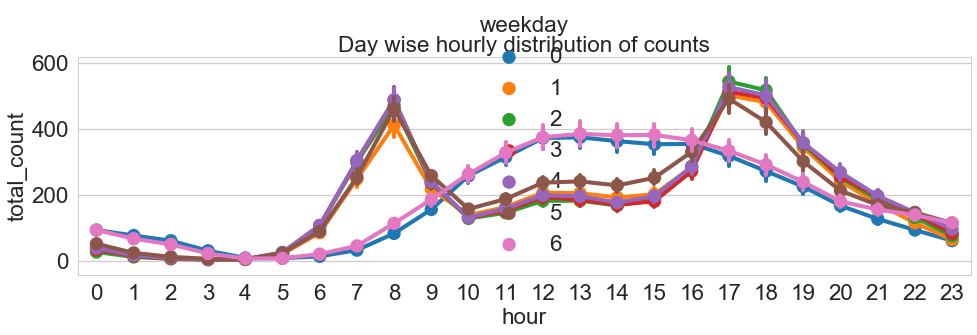

In [16]:
fig, ax = plt.subplots(figsize=(16,4))
sns.pointplot(data=df[['hour','total_count','weekday']],
              x='hour',
              y='total_count',
              hue='weekday',ax=ax)
ax.set(title = "Day wise hourly distribution of counts")
plt.show()

* Weekends (0 and 6) and Weekdays (1-5) show different usage trends with weekend's peak usage in during afternoon hours
* Weekdays follow the overall trend, similar to one visualized in the previous plot
* Weekdays have higher usage as compared to weekends
* It would be interesting to see the trends for casual and registered users separately

[Text(0.5,1,'Box Pot for hourly distribution of counts')]

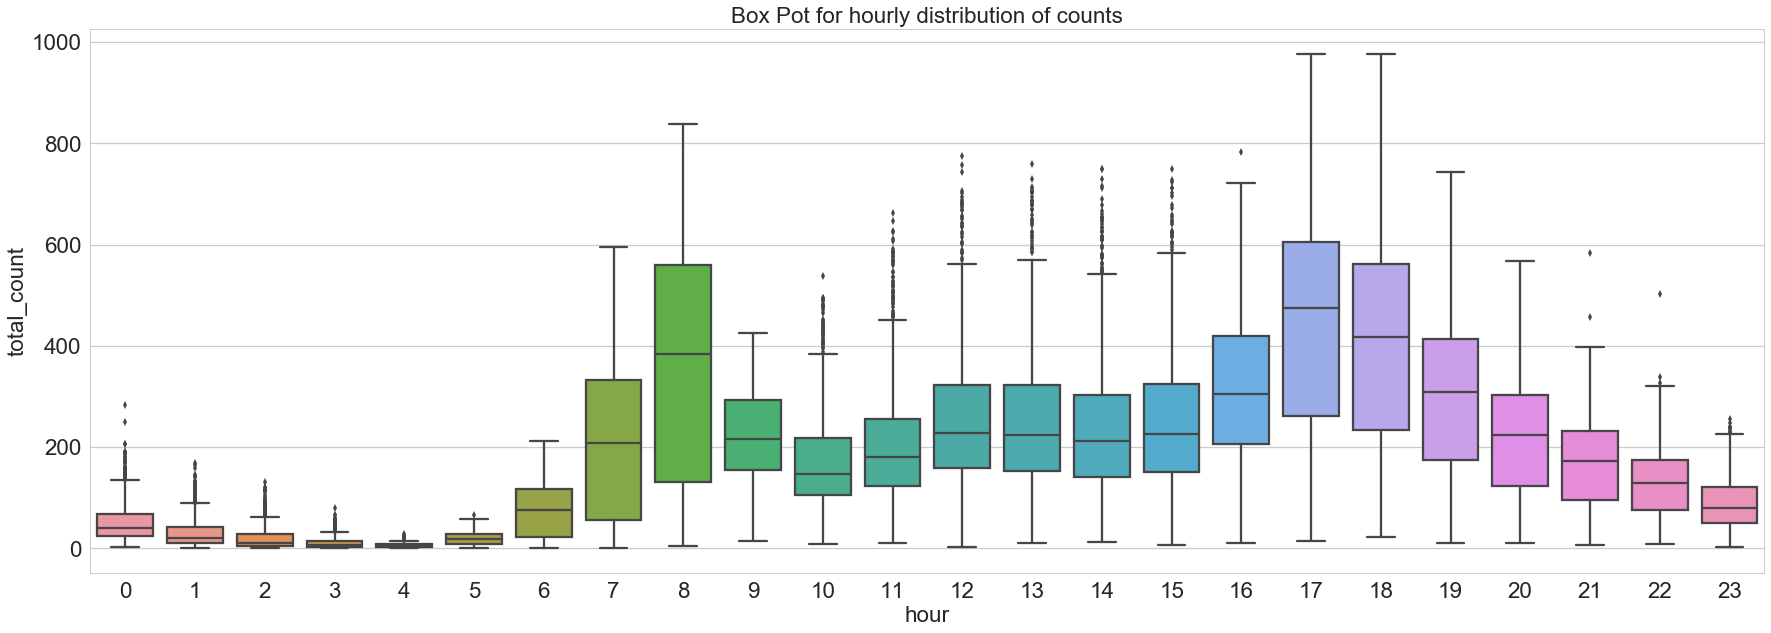

In [17]:
fig,ax = plt.subplots()
sns.boxplot(data=df[['hour','total_count']],x="hour",y="total_count",ax=ax)
ax.set(title="Box Pot for hourly distribution of counts")

* Early hours (0-4) and late nights (21-23) have low counts but significant outliers
* Afternoon hours also have outliers
* Peak hours have higher medians and overall counts with virtually no outliers

## Monthly distribution of Total Counts

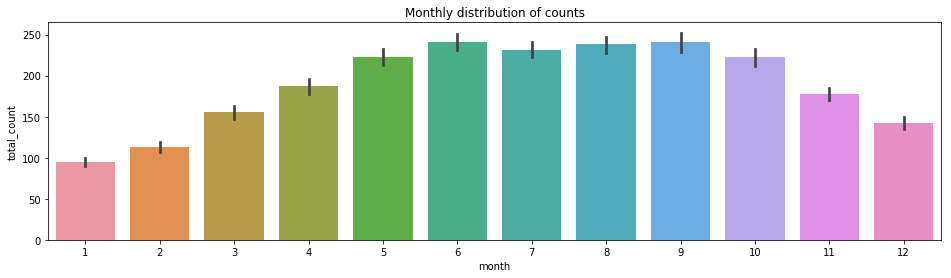

In [52]:
fig,ax = plt.subplots(figsize=(16,4))
sns.barplot(data=df[['month',
'total_count']],
x="month",y="total_count")
ax.set(title="Monthly distribution of counts")
plt.show()

* Months June-Oct have highest counts. Fall seems to be favorite time of the year to use cycles

[Text(0.5,1,'Winter')]

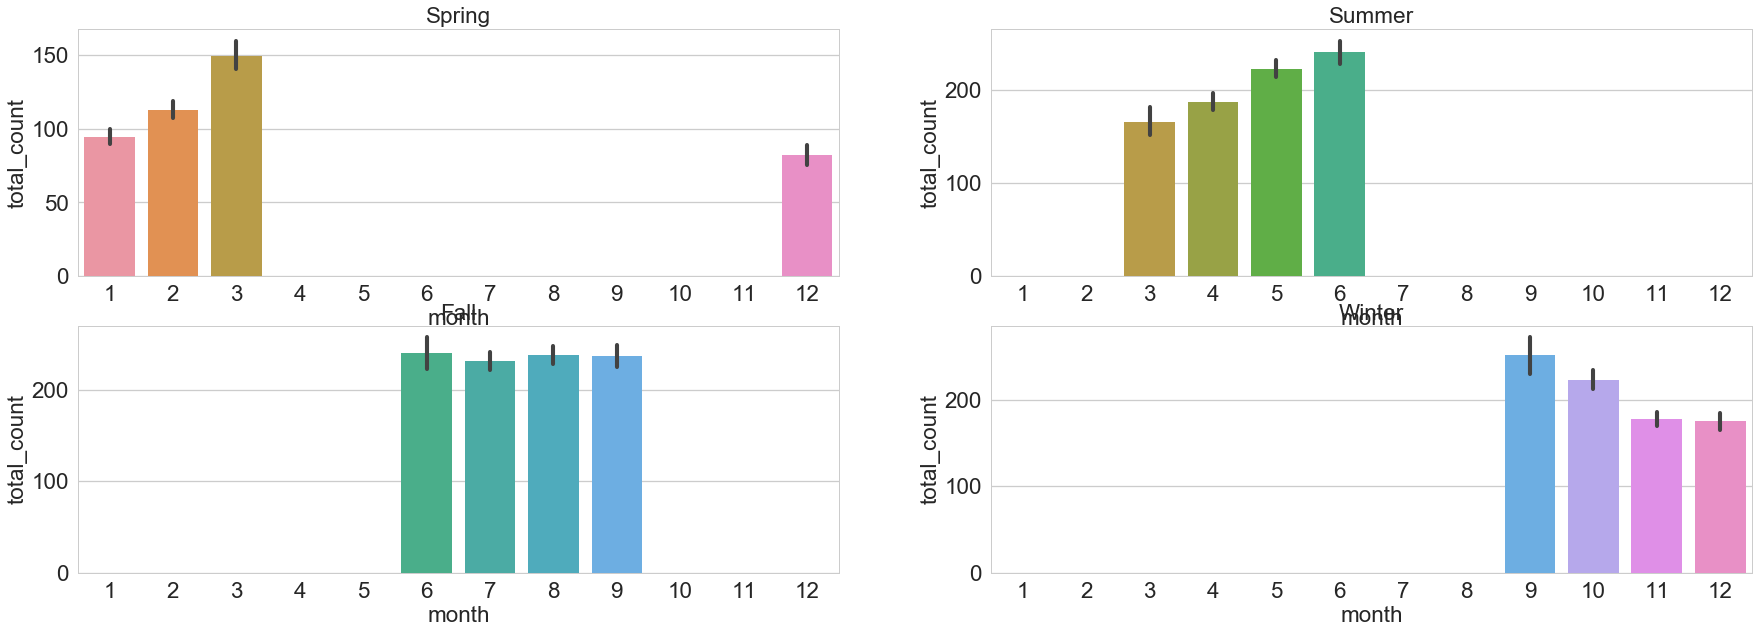

In [18]:
df_col_list = ['month','weekday','total_count']
plot_col_list= ['month','total_count']
spring_df = df[df.season==1][df_col_list]
summer_df = df[df.season==2][df_col_list]
fall_df = df[df.season==3][df_col_list]
winter_df = df[df.season==4][df_col_list]

fig,ax= plt.subplots(nrows=2,ncols=2)
sns.barplot(data=spring_df[plot_col_list],x="month",y="total_count",ax=ax[0][0],)
ax[0][0].set(title="Spring")

sns.barplot(data=summer_df[plot_col_list],x="month",y="total_count",ax=ax[0][1])
ax[0][1].set(title="Summer")

sns.barplot(data=fall_df[plot_col_list],x="month",y="total_count",ax=ax[1][0])
ax[1][0].set(title="Fall")

sns.barplot(data=winter_df[plot_col_list],x="month",y="total_count",ax=ax[1][1])  
ax[1][1].set(title="Winter")

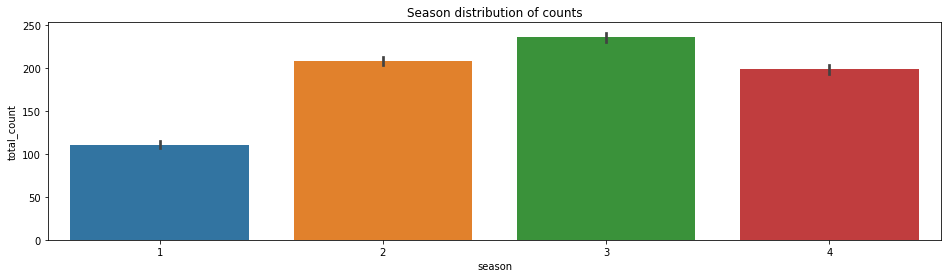

In [55]:
fig,ax = plt.subplots(figsize=(16,4))
sns.barplot(data=df[['season',
'total_count']],
x="season",y="total_count")
ax.set(title="Season distribution of counts")
plt.show()

# Year Wise Count Distributions

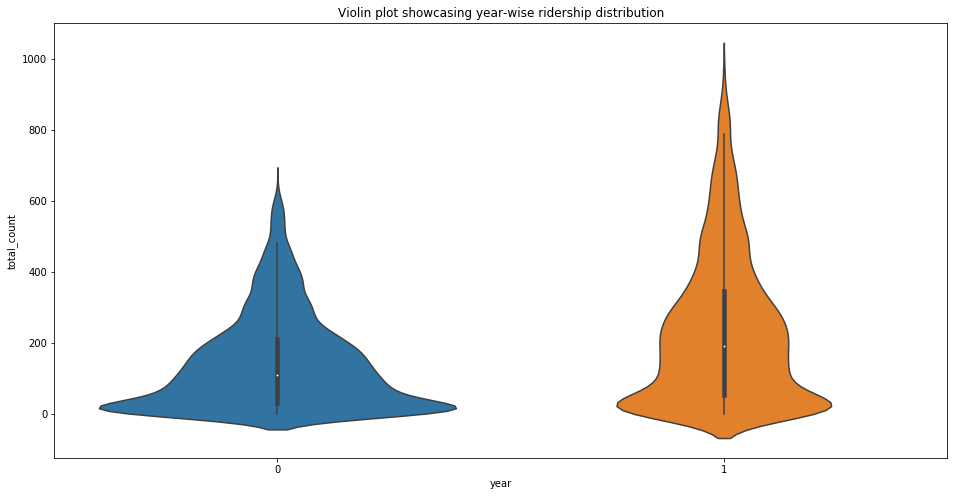

In [61]:
fig,ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=df[['year',
 'total_count']],
 x="year",y="total_count")
ax.set(title='Violin plot showcasing year-wise ridership distribution')
plt.show()

* Both years have multimodal distributions
* 2011 has lower counts overall with a lower median
* 2012 has a higher max count though the peaks are around 100 and 300 which is then tapering off

## Working Day Vs Holiday Distribution

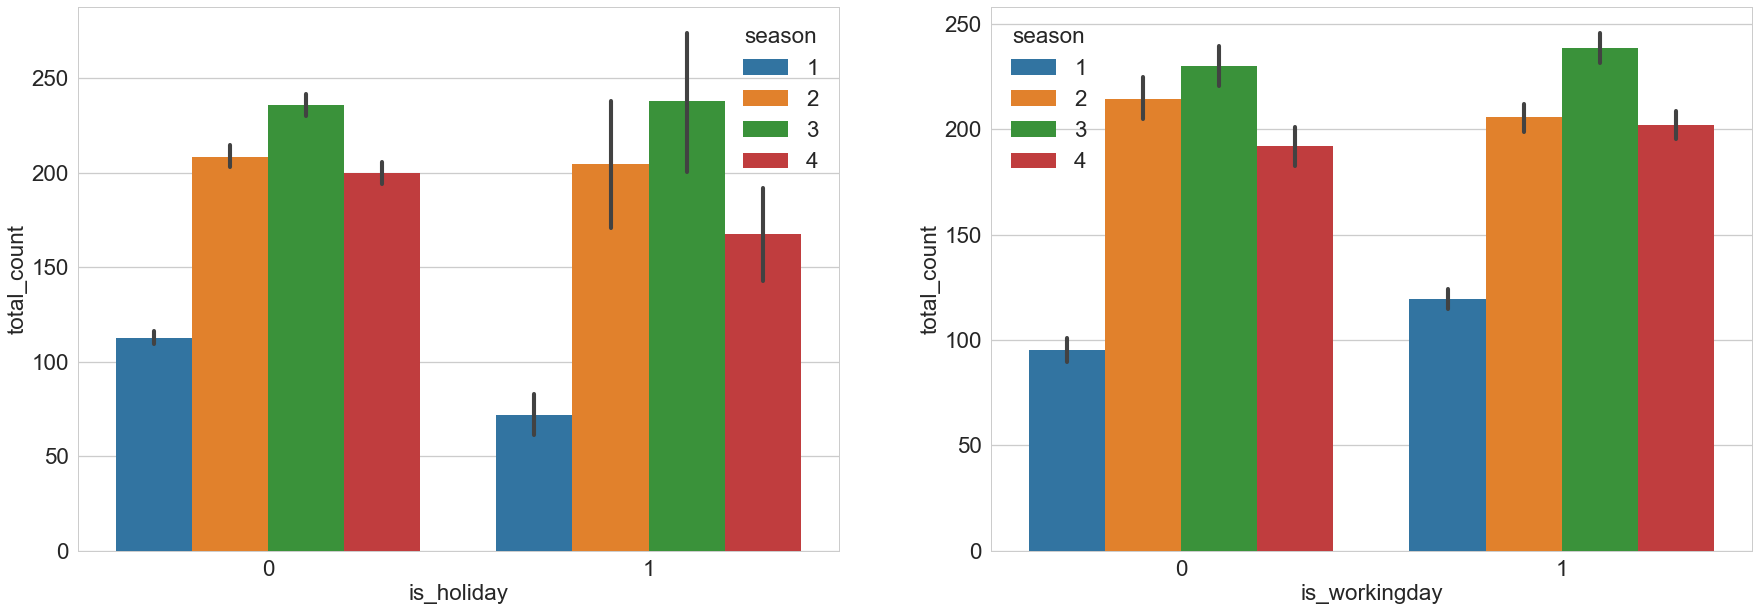

In [19]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.barplot(data=df,x='is_holiday',y='total_count',hue='season',ax=ax1)
sns.barplot(data=df,x='is_workingday',y='total_count',hue='season',ax=ax2)

# Outliers

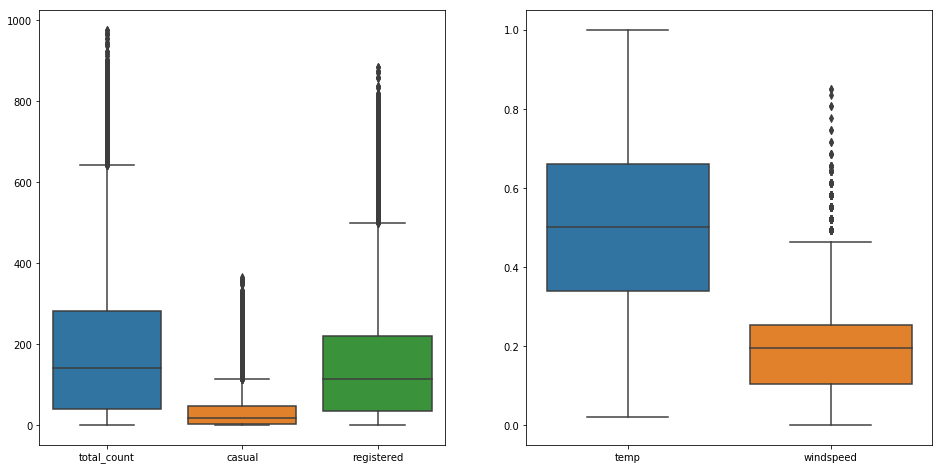

In [65]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(16,8))
sns.boxplot(data=df[['total_count',
'casual','registered']],ax=ax1)
sns.boxplot(data=df[['temp','windspeed']],ax=ax2)
plt.show()

# Correlations

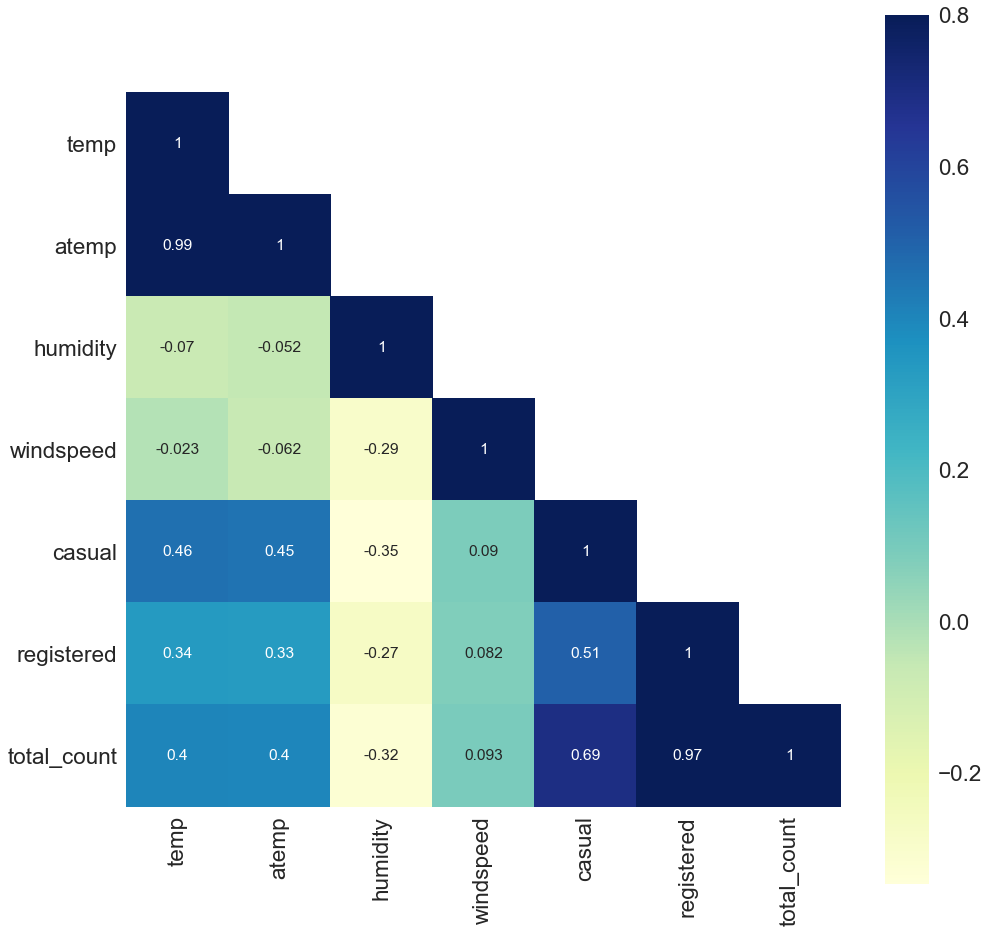

In [20]:
fig,ax = plt.subplots(figsize=(16,16))
corrMatt = df[["temp","atemp",
"humidity","windspeed",
"casual","registered",
"total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
vmax=.8, square=True,annot=True, cmap="YlGnBu")
plt.show()

* Correlation between temp and atemp is very high (as expected)
* Same is te case with registered-total_count and casual-total_count
* Windspeed to humidity has negative correlation
* Overall correlational statistics are not very high.